# Image Processing with Python -- <font color='orange'>Tutorial Pipeline Solutions</font>

##  About this Tutorial -- <font color='orange'> Notes on the Solutions </font>

These are the **complete solutions** to the tutorial. For the best learning experience, *it is recommended that you first try to implement a solution yourself* (see `tutorial_pipeline.py`). Only come here if you are totally stuck or if you have a working solution and would like to double-check it.

Note that there are multiple ways of implementing any particular step in the pipeline, so if your solution is different from the solution here, it is not necessarily wrong. However, *some solutions are better than others* because they are...

1. ...more readable:
    - When reading the code, it is obvious and clear what the code is doing
    - The code is clearly commented to help others (and your future self) understand it


2. ...more general:
    - The code still works if there are minor changes to the data (e.g. size of the image being processed)
    - The code can easily be transformed into a solution for a similar problem


3. ...more computationally efficient:
    - No unnecessary copies of large datasets are made (memory efficiency)
    - Faster algorithms are used, e.g. array operations instead of loops (CPU efficiency)
    - No unnecessary loading and writing of data (io efficiency)


It is up to you to decide if your solution is better, equally good, or not as good as the solution presented here. Either way, we hope you can learn something by looking at our solutions. **:)**

## Importing Modules & Packages

In [1]:
# The numerical array package numpy as np
import numpy as np

#### <font color='orange'> Exercise Solution </font> 

Using the import command as above, follow the instructions in the comments below to import two additional modules that we will be using frequently in this pipeline.

In [2]:
# The plotting module matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# The image processing package scipy.ndimage as ndi
import scipy.ndimage as ndi

#### Side Note for Jupyter Notebook Users

You can configure how the figures made by matplotlib are displayed.

In [3]:
# Set matplotlib backend
%matplotlib inline

## Importing & Handling Image Data

#### <font color='orange'> Exercise Solution </font>

We will now proceed to import some image data, verifying that we get what we expect and then further specifying the data we will work with. Before you start, it makes sense to have a quick look at the data in Fiji/ImageJ so you know what you are working with!

Follow the instructions in the comments below.

In [4]:
# (i) Specify the filename
# Create a string variable with the name of the file to be imported ('example_cells_1.tif')
# Suggested name for the variable: filename
# Note: If the file is not in your current working directory, the filename variable must contain the 
#       entire path to the file, for example r'/home/jack/data/example_cells_1.tif'. Note the r at
#       the beginning of the string: it designates this string as a "raw" string, which helps to
#       avoid problems with slashes and other special symbols

id = '00ae65c1c6631ae6f2be1a449902976e6eb8483bf6b0740d00530220832c6d3e'
filename = 'stage1_train/' + id + '/images/' + id + '.png'   # XXX: DELETME!

In [6]:
# (ii) Load the image

from skimage.io import imread

# Suggested name for the variable: img
img = imread(filename)

In [7]:
# (iii) Check that everything is in order
# Check that 'img' is a variable of type 'ndarray' - use Python's built-in function 'type'.
print ("Loaded array is of type:", type(img))

# Print the shape of the array using the numpy-function 'shape'. 
# Make sure you understand the output; recall that the image has 2 color channels and is 930 by 780 pixels. 
print ("Loaded array has shape:", img.shape)

# Check the datatype of the individual numbers in the array. You can use the array attribute 'dtype' to do so.
print ("Loaded values are of type:", img.dtype)

# SOLUTION NOTE: The dtype should be 'uint8', because these are unsigned 8-bit integer images.
#                This means that the intensity values range from 0 to 255 in steps of 1.

Loaded array is of type: <class 'numpy.ndarray'>
Loaded array has shape: (256, 320, 4)
Loaded values are of type: uint8


In [11]:
# (iv) Allocate the green channel to a separate new variable
# For segmentation, we will only work with the green channel, so we need to allocate it to a new variable. 
# The green channel in this image is the first channel (or channel 0 in python). 
# We can allocated it to a new variable by slicing the 'img' array.
# Hint: Recall that the image has three dimensions, two (rows and columns) defining the size of the image 
#       in terms of pixels, and one defining the number of channels. To slice the array, you need to index  
#       each dimension to specify what you want from it.
#       For example, array A below has two dimensions.
#         A = np.array([[1,2,3],[4,5,6]])
#       To obtain all entries in the first row, we would slice like this:
#         B = A[0,:]
#       You can slice the 2D green channel out of the 3D 'img' array in a similar fashion. 
green = img[:,:,0]

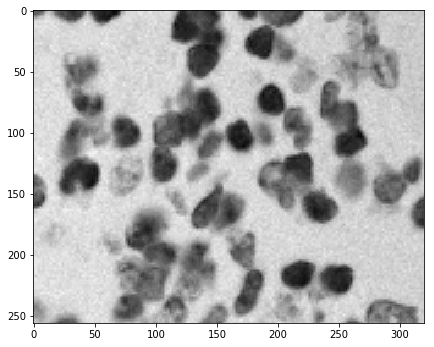

In [12]:
# (v) Look at the image to confirm that everything worked as intended
# Show one of the channels as an image; use pyplot's functions plt.imshow followed by plt.show. 
# Check the documentation for plt.imshow and note the parameters that can be specified, such as the color map (cmap)
# and interpolation. Since you are working with scientific data, interpolation is unwelcome, so you should set it to
# 'none'. The most common cmap for grayscale images is naturally 'gray'.
# You may also want to adjust the size of the figure. You can do this by preparing the figure canvas with
# the function plt.figure before calling plt.imshow. The canvas size is adjusted using the keyword argument
# figsize when calling plt.figure.
plt.figure(figsize=(7,7))
plt.imshow(green,interpolation='none',cmap='gray')
plt.show()

## Preprocessing

#### <font color='orange'> Exercise Solution </font>

Follow the instructions in the comments below:

In [13]:
# (i) Create a variable for the smoothing factor sigma, which should be an integer value
# After implementing the Gaussian smoothing function below, you can modify this variable 
# to find the ideal value of sigma.
sigma = 3

In [14]:
# (ii) Perform the smoothing on the image
# To do so, use the Gaussian filter function 'ndi.filters.gaussian_filter' from the 
# image processing package ndimage, which was imported at the start of the tutorial. 
# Check out the documentation of scipy to see how to implement this function. 
# Allocate the output to a new variable.
green_smooth = ndi.filters.gaussian_filter(green,sigma)

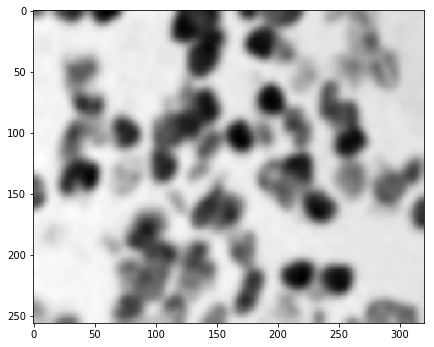

In [15]:
# (iii) Visualize the result using plt.imshow and plt.show
# Compare with the original image visualized in the step above. 
# Does the output make sense? Is this what you expected? 
# Can you optimize sigma such that the image looks smooth without blurring the membranes too much?
plt.figure(figsize=(7,7))
plt.imshow(green_smooth,interpolation='none',cmap='gray')
plt.show()

## Adaptive Thresholding

#### <font color='orange'> Exercise Solution </font>

Implement the two steps of adaptive background subtraction:

1. Use a strong "mean filter" to create the background image. This simply assigns each pixel the average value of its local neighborhood. Just like the Gaussian blur, it can be done by deconvolution, but this time using a "uniform kernel".

2. Use the background image for thresholding. Pixels with higher values in the original image than in the background should be given the value 1 and pixels with lower values in the original image than in the background should be given the value 0. The resulting binary image should represent the cell membranes.

Follow the instructions in the comments below.

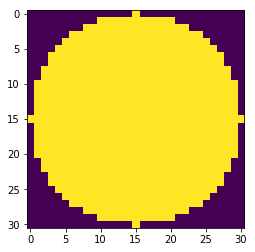

In [16]:
# Step 1

# (i) Create a disk-shaped structuring element and asign it to a new variable.
# Structuring elements are small binary images that indicate which pixels 
# should be considered as the 'neighborhood' of the central pixel. 
#
# An example of a small disk-shaped SE would be this:
#   0 0 1 0 0
#   0 1 1 1 0
#   1 1 1 1 1
#   0 1 1 1 0
#   0 0 1 0 0
#
# The equation below creates such structuring elements. 
# It is an elegant but complicated piece of code and at the moment it is not 
# necessary for you to understand it in detail. Use it to create structuring 
# elements of different sizes (by changing 'i') and find a way to visualize 
# the result.
# 
# Try to answer the following questions: 
#   - Is the resulting SE really circular?  >>> Close enough for large i, not so much for small i
#   - Can certain values of 'i' cause problems? If so, why?  >>> Even values create a slight asymmetry!
#   - What value of i should used for the se? 
#     Note that, similar to the sigma in Gaussian smoothing, the size of the SE
#     is first estimated based on the images and by thinking about what would 
#     make sense. Later, it can be optimized by trial and error.
#     >>> My first guess was i=30 (about 3x the membrane diameter). 
#         I tried out some other values but ultimately stuck with this.
i = 31
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2
plt.imshow(struct,interpolation='none')
plt.show()

In [17]:
# (ii) Create the background
# Run a mean filter over the image using the disc SE and assign the output to a new variable.
# Use the function 'skimage.filters.rank.mean' (you first need to import the 'skimage.filters.rank' module).
# Think about why a mean filter is used and if a different function (e.g. minimum, maximum or median) 
# would work equally well.
from skimage.filters import rank 
bg = rank.mean(green_smooth, selem=struct)

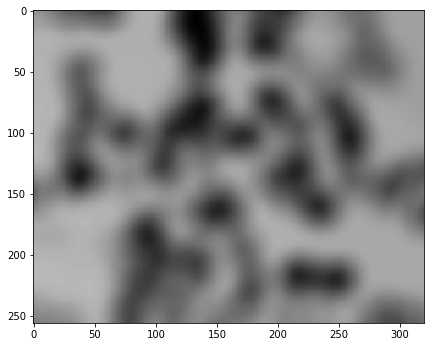

In [18]:
# (iii) Visualize the resulting background image. 
# Compare it to the images generated above. Does the outcome make sense?
plt.figure(figsize=(7,7))
plt.imshow(bg,interpolation='none',cmap='gray',vmax=255)
plt.show()

In [19]:
# Step 2  

# (iv) Threshold the Gaussian-smoothed original image using the background image created in step 1 
#      to obtain the cell membrane segmentation
# Set pixels with higher values in the original than in the bg to 1 and pixels with lower values to 0. 
# You can use a "relational operator" to do this, since numpy arrays will automatically perform element-wise
# comparisons when compared to other arrays of the same shape.
green_mem = green_smooth >= bg

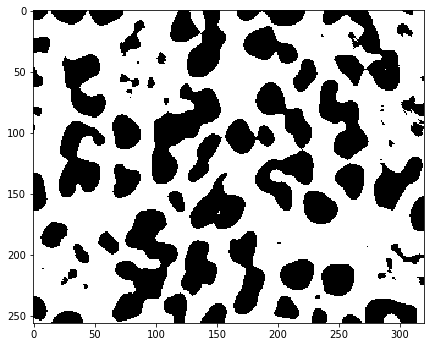

In [20]:
# (v) Visualize and understand the output. 
# What do you observe? 
# Are you happy with this result as a membrane segmentation? 
# >>> Not really; there is too much stuff inside the cells!
plt.figure(figsize=(7,7))
plt.imshow(green_mem,interpolation='none',cmap='gray')
plt.show()

## Improving Masks with Binary Morphology

#### <font color='orange'> Exercise Solution </font>

Improve the membrane segmentation from above with morphological operations.

Specifically, use `binary hole filling` to get rid of the speckles of foreground pixels that litter the insides of the cells. Furthermore, try different other types of morphological filtering to see how they change the image and to see if you can improve the membrane mask even more, e.g. by filling in gaps.

Follow the instructions in the comments below.

In [21]:
# (i) Get rid of speckles using binary hole filling
# Use the function ndi.binary_fill_holes for this. Be sure to read up on the docs to
# understand exactly what it does. For this to work as intended, you will have to 
# invert the mask, which you can do using the function np.logical_not. Again, be
# sure to understand why this has to be done.
green_mem_holes_filled = ndi.binary_fill_holes(np.logical_not(green_mem))

In [22]:
# (ii) Try out other morphological operations to further improve the membrane mask
# The various operations are available in ndimage, for example ndi.binary_closing.
# Play around and see how the different functions affect the mask. Can you optimize
# the mask, for example by closing gaps?
# Note that the default SE for these functions is a square. Feel free to create a
# new disc-shaped SE and see how that changes the outcome.
# Also, if you pay close attention you will notice that some of these operations
# introduce artifacts at the image boundaries. Can you come up with a way of
# solving this?

# New circular SE of appropriate size (size determined by trial and error)
i = 15
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# One solution to the boundary issues is padding with the reflection
# 'Padding' means the addition of pixels to the image. This means the boundary issues
# will happen outside of the 'actual' image, which can then be cropped out again.
pad_size = i+1
padded_mem = np.pad(green_mem_holes_filled,pad_size,mode='reflect')

# Binary closing works well to round off the membranes and close gaps
mem_final = ndi.binary_closing(np.logical_not(padded_mem),structure=struct)

# This slicing crops the padded image back to the original size
mem_final = mem_final[pad_size:-pad_size,pad_size:-pad_size]

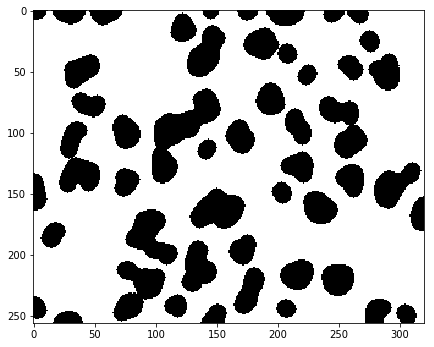

In [23]:
# (iii) Visualize the final result
# At this point you should have a pretty neat membrane mask.
# If you are not satisfied with the quality your membrane segmentation, you should go back 
# and fine tune size of the SE in the adaptive thresholding section and also optimize the
# morphological cleaning operations.
# Note that the quality of the membrane segmentation will have a significant impact on the 
# cell segmentation we will perform downstream.
plt.figure(figsize=(7,7))
plt.imshow(mem_final,interpolation='none',cmap='gray')
plt.show()

## Connected Components Labeling

#### <font color='orange'> Exercise Solution </font>

Use your membrane segmentation for connected components labeling.

Follow the instructions in the comments below.

In [24]:
# (i) Label connected components
# Use the function ndi.label from ndimage. 
# Note that this function labels foreground pixels (`1`), so you may need to invert your mask
# again if your membrane mask is currently labeled as foreground.
mem_final = np.logical_not(mem_final)
cell_labels,_ = ndi.label(mem_final)

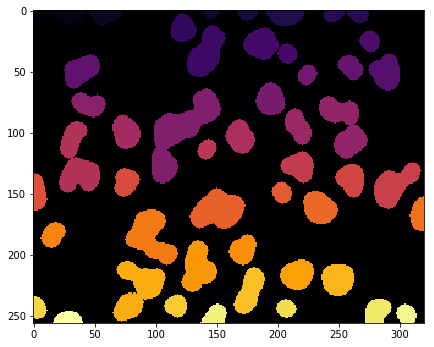

In [25]:
# (ii) Visualize the output
# Here, it is no longer ideal to use a 'gray' colormap, since we want to visualize that each
# cell has a unique ID. Play around with different colormaps (check the docs to see what
# types of colormaps are available) and choose one that you are happy with.
# Take a close look at the picture and note mistakes in the segmentation. Depending on the
# quality of your membrane mask, there will most likely be some cells that are falsely 
# labeled as the same cells; this is called "under-segmentation". We will resolve this
# issue in the next step. Note that our downstream pipeline does not involve any steps to
# resolve "over-segmentation", so you should fine-tune your membrane mask such that this
# is not a common problem.
plt.figure(figsize=(7,7))
plt.imshow(cell_labels,interpolation='none',cmap='inferno')
plt.show()

## Cell Segmentation by Seeding & Expansion

### Seeding by Distance Transform

#### <font color='orange'> Exercise Solution </font>

Retrieve seeds using distance transformation.

This involves the following three steps:

1. Run the distance transform on your membrane mask.

2. Due to irregularities in the membrane shape, the distance transform may have some smaller local maxima in addition to those at the center of the cells. This will lead to additional seeds, which will lead to over-segmentation. To resolve this problem, smoothen the distance transform by applying a dilation/maximum filter. 

3. Find the seeds by detecting local maxima. Optimize the seeding by changing the dilation in step 2, aiming to have exactly one seed for each cell.

Follow the instructions in the comments below.

In [26]:
# (i) Distance transform on thresholded membranes
# Use the function ndi.distance_transform_edt.
dist_trans = ndi.distance_transform_edt(mem_final)

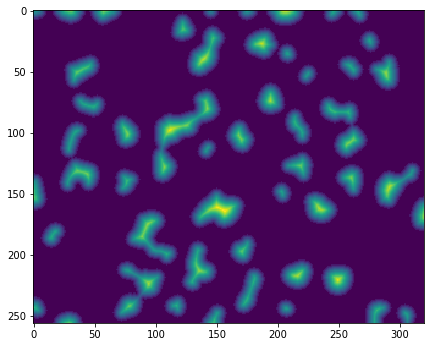

In [27]:
# (ii) Visualise the output and understand what you are seeing.
plt.figure(figsize=(7,7))
plt.imshow(dist_trans,interpolation='none',cmap='viridis')
plt.show()

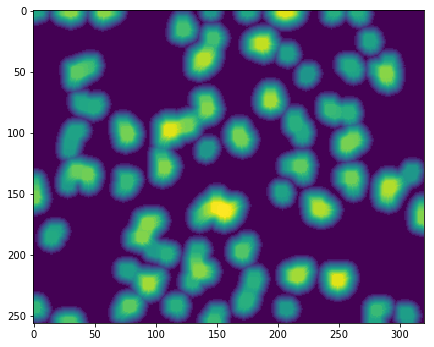

In [28]:
# (iii) Dilate the distance threshold
# Use ndi.filters.maximum_filter to dilate the distance transform.
# Read the documentation to remind yourself how and where the structuring element can be defined with this function.
# You can try different SE sizes and shapes. 

# Using again a circular SE
i = 10
struct = (np.mgrid[:i,:i][0] - np.floor(i/2))**2 + (np.mgrid[:i,:i][1] - np.floor(i/2))**2 <= np.floor(i/2)**2

# Running the dilation
dist_trans_dil = ndi.filters.maximum_filter(dist_trans, footprint=struct) 

# Visualizing again
plt.figure(figsize=(7,7))
plt.imshow(dist_trans_dil, interpolation='none', cmap='viridis')
plt.show()

In [29]:
# (iv) Retrieve the local maxima (the 'peaks') in the distance transform
# Use the function peak_local_max from the module skimage.feature. By default, this function will return the
# indices of the pixels where the local maxima are. However, we instead need a boolean mask of the same shape 
# as the original image, where all the local maximum pixels are labeled as `1` and everything else as `0`.
# This can be achieved by setting the keyword argument 'indices' to False.
from skimage.feature import peak_local_max
seeds = peak_local_max(dist_trans_dil, indices=False, min_distance=10)

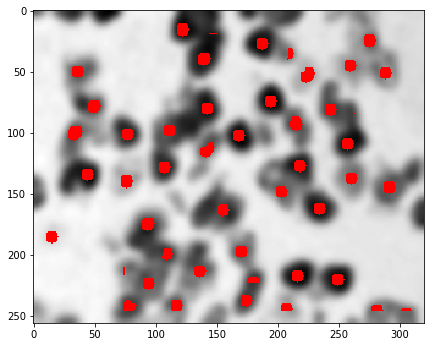

In [30]:
# (v) Visualize the output as an overlay on the original (smoothed) image
# If you just look at the local maxima image, it will simply look like a bunch of distributed dots.
# To get an idea if the seeds are well-placed, you will need to overlay these dots onto the original image.
# To do this, it is important to first understand a key point about how the pyplot module works: 
# every plotting command is slapped on top of the previous plotting commands, until everything is ultimately 
# shown when plt.show is called. Hence, you can first plot the original input (or the smoothed) image and 
# then plot the seeds on top of it before showing both with 'plt.show'.
# As you can see if you try this, you will not get the desired result because the zero values in seed array
# are painted in black over the image you want in the background. To solve this problem, you need to mask 
# these zero values before plotting the seeds. You can do this by creating an appropriately masked array
# using the function 'np.ma.array'. Check the docs to figure out how to do this.
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(seeds,mask=seeds==0),interpolation='none',cmap='autumn')
plt.show()

In [ ]:
# (vi) Optimize the seeding
# Ideally, there should be exactly one seed for each cell.
# If you are not satisfied with your seeding, go back to the dilation step above and optimize it to get 
# rid of additional maxima. You can also try using the keyword argument min_distance in peak_local_max 
# to solve cases where there are multiple small seeds at the center of a cell.
# Note that good seeding is essential for a good segmentation with an expansion algorithm. However,
# no segmentation is ever perfect, so it's okay if a few cells end up being oversegmented!


In [31]:
# (vii) Label the seeds
# Use connected component labeling to give each cell seed a unique ID number.
seeds_labeled = ndi.label(seeds)[0]

### Expansion by Watershed

#### <font color='orange'> Exercise Solution </font>

Expand your seeds by means of a watershed expansion.

Follow the instructions in the comments below.

In [32]:
# (i) Perform watershed
# Use the function watershed from the module skimage.morphology.
# Use the labeled cell seeds and the smoothed membrane image as input.
from skimage.morphology import watershed
ws = watershed(green_smooth,seeds_labeled)

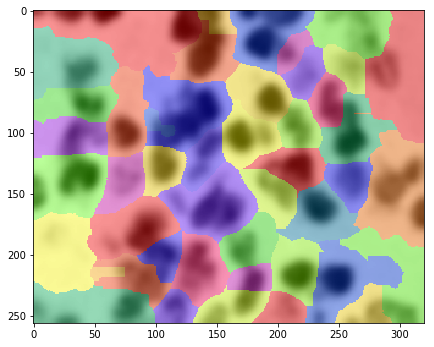

In [33]:
# (ii) Show the result as transparent overlay over the smoothed input image
# This can be done similar to the masked overlay of the seeds, but now you don't need to mask 
# the background in the overlayed image (there will be none, since everything gets labeled in
# the watershed). Instead, you need to make the overlayed image semi-transparent. 
# This can be achieved using the optional argument 'alpha' of the 'plt.imshow' function 
# to specify the opacity.
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(ws,interpolation='none',cmap='prism',alpha=0.4)
plt.show()

#### *A Note on Segmentation Quality*

This concludes the segmentation of the cells in the example image. Depending on the quality you achieved in each step along the way, the final segmentation may be of greater or lesser quality (in terms of over-/under-segmentation errors).

It should be noted that the segmentation will likely *never* be 'perfect'! This can't be helped because image segmentation is ultimately a `computational classification task` and all such tasks are subject to a fundamental trade-off between specificity and sensitivity, which in this case takes the form of a trade-off between over- and under-segmentation.

This raises an important question: ***when should I stop trying to optimize my segmentation?***

There is no absolute answer to this question, but the best answer is probably ***when you can use it to address your biological questions.***

*Importantly, this implies that you should already have a relatively clear question in mind when you are working on the segmentation!*

## Postprocessing: Removing Cells at the Image Border

#### <font color='orange'> Exercise Solution </font>

Iterate through all the cells in your segmentation and remove those that are at the image border.

Follow the instructions in the comments below. Note that the instructions will tend to be less specific from here on, so you need to figure out how to approach a problem yourself.

In [34]:
# (i) Create image border mask
# We need some way to check if a cell is at the border. For this, we generate a 'mask' of the image border,
# i.e. a Boolean array of the same size as the image where only the border pixels are set to `1` and all 
# others to `0`, like this:
#   1 1 1 1 1
#   1 0 0 0 1
#   1 0 0 0 1
#   1 0 0 0 1
#   1 1 1 1 1
# There are multiple ways of generating this mask, for example by erosion or by array indexing.
# It is up to you to find a way to do it.
boundary_mask = np.ones(ws.shape,dtype=np.bool)
boundary_mask = np.logical_not(ndi.binary_erosion(boundary_mask,border_value=0))

In [35]:
# (ii) 'Delete' the cells at the border:
# Note: When modifying a segmentation (in this case by deleting some cells), it makes sense
#       to work on a copy of the array, not on the original. This avoids unexpected behaviors,
#       especially within jupyter notebooks. Use the function np.copy to copy an array.
clean_ws = np.copy(ws)

# Iterate over all cells in the segmentation. Use a for-loop and the function np.unique;
# remember that each cell in our segmentation is labeled with a different integer.
for cell_ID in np.unique(ws):

    # Create a mask that contains only the 'current' cell in the iteration
    # Hint: Remember that the comparison of an array with some number (array==number)
    #       returns a Boolean mask of the pixels in 'array' whose value is 'number'.
    cell_mask = ws==cell_ID 
    
    # Using the cell mask and the border mask from above, test if the cell has pixels touching 
    # the image boundary or not.
    # Hint: np.logical_and
    cell_boundary_overlap = np.logical_and(cell_mask,boundary_mask)   # Overlap of cell mask and boundary mask
    total_overlapping_pixels = np.sum(cell_boundary_overlap)          # Sum overlapping pixels
    
    # If a cell touches the image boundary, delete it by setting its pixels in the segmentation to 0.
    if total_overlapping_pixels > 0: 
        clean_ws[cell_mask] = 0


# OPTIONAL: re-label the remaining cells to keep the numbering consistant from 1 to N (with 0 as background).
for new_ID,cell_ID in enumerate(np.unique(clean_ws)[1:]):  # The [1:] excludes 0 from the list (background)!
    clean_ws[clean_ws==cell_ID] = new_ID+1                 # The same here for the +1

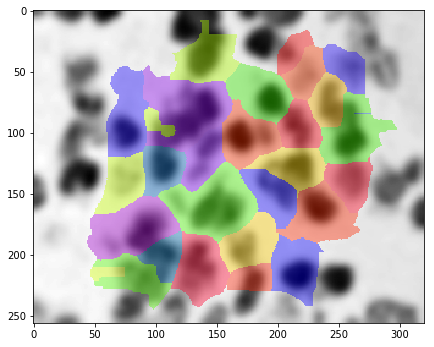

In [36]:
# (iii) Visualize the result
# Show the result as transparent overlay over the original/blurred image. 
# Here you have to combine alpha (to show cells transparently) and 'np.ma.array'
# (to hide empty space where the border cells were deleted).
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(clean_ws,mask=clean_ws==0),interpolation='none',cmap='prism',alpha=0.4)
plt.show()

## Identifying Cell Edges

#### <font color='orange'> Exercise Solution </font>

Create a labeled mask of cell edges by following these steps:


- Create an empty array of the same size and data type as the segmentation
    - This will be your final cell edge mask; you gradually add cell edges as you iterate over cells
    

- *For each cell:*
    - Erode the cell's mask by 1 pixel
    - Using the eroded mask and the original mask, create a new mask of only the cell's edge pixels
    - Add the cell's edge pixels into the empty image generated above, labeling them with the cell's original ID number


Follow the instructions in the comments below.

In [37]:
# (i) Create an empty array of the same size and data type as the segmentation
# Hint: np.zeros_like(...) or np.zeros(...,dtype=...)
edges = np.zeros_like(clean_ws)

In [38]:
# (ii) Iterate over the cells
# Hint: np.unique
for cell_ID in np.unique(clean_ws)[1:]:

    # (iii) Erode the cell's mask by 1 pixel
    # Hint: smart indexing and ndi.binary_erode
    cell_mask = clean_ws==cell_ID
    eroded_cell_mask = ndi.binary_erosion(cell_mask)
    
    # (iv) Create cell edge mask
    # Hint: np.logical_xor
    edge_mask = np.logical_xor(cell_mask,eroded_cell_mask)
    
    # (v) Add the cell edge mask to the empty array generated above, labeling it with the cell's ID
    # Hint: smart indexing
    edges[edge_mask] = cell_ID

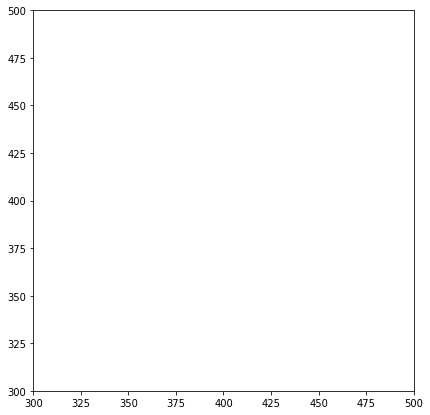

In [39]:
# (vi) Visualize the result
# Note: Because the lines are so thin (1pxl wide), they may not be displayed correctly in small images.
#       If you wish, you can try and find a solution for this problem. One simple option is just to
#       show a (zoomed-in) sub-region of the image.
plt.figure(figsize=(7,7))
plt.imshow(np.zeros_like(edges),cmap='gray',vmin=0,vmax=1)  # Black background
plt.imshow(np.ma.array(edges,mask=edges==0),interpolation='none',cmap='prism')
plt.xlim((300,500))
plt.ylim((300,500))
plt.show()

## Extracting Quantitative Measurements

#### <font color='orange'> Exercise Solution </font>

Extract the measurements listed above for each cell and collect them in a dictionary.

Follow the instructions in the comments below.

In [40]:
# (i) Create a dictionary that contains a key-value pairing for each measurement
# The keys should be a strings describing the type of measurement (e.g. 'green_intensity_mean') 
# and the values should be empty lists. These empty lists will be filled with the results of 
# the measurements and the dictionary will make it easy to work with this data.
results = {"cell_id":[],
           "green_mean":[],
           "red_mean":[],
           "green_mem_mean":[],
           "red_mem_mean":[],
           "cell_area":[],
           "cell_edge":[]}

In [41]:
# (ii) Record the measurements for each cell
# Iterate over the segmented cells (np.unique).
# Inside the loop, create a mask for the current cell and use it to extract the measurements listed above. 
# Add them to the appropriate list in the dictionary using the list.append method.
# Hint: Remember that you can get out all the values within a masked area by indexing the image 
#       with the mask. For example, np.mean(image[cell_mask]) will return the mean of all the 
#       intensity values of 'image' that are masked by 'cell_mask'.

# Iterate over cell IDs
for cell_id in np.unique(clean_ws)[1:]:

    # Mask the current cell and cell edge
    cell_mask = clean_ws==cell_id
    edge_mask = edges==cell_id
    
    # Get the measurements
    # Note: the .item() method ensures that the resulting number is converted from a numpy number object
    #       (e.g. type np.float) to a native python number object (e.g. type float). For most purposes,
    #       this is irrelevant, but for saving data in a python object as we do later on, it is useful
    #       to use native python objects only.
    results["cell_id"].append(cell_id.item())
    results["green_mean"].append(np.mean(img[0,cell_mask]).item())
    results["red_mean"  ].append(np.mean(img[1,cell_mask]).item())
    results["green_mem_mean"].append(np.mean(img[0,edge_mask]).item())
    results["red_mem_mean"  ].append(np.mean(img[1,edge_mask]).item())
    results["cell_area"].append(np.sum(cell_mask).item())
    results["cell_edge"].append(np.sum(edge_mask).item())

IndexError: boolean index did not match indexed array along dimension 1; dimension is 320 but corresponding boolean dimension is 256

In [42]:
# (iii) Print the results and check that they make sense
for key in results.keys(): print(key, '\n', results[key], '\n')

cell_id 
 [1] 

green_mean 
 [] 

red_mean 
 [] 

green_mem_mean 
 [] 

red_mem_mean 
 [] 

cell_area 
 [] 

cell_edge 
 [] 



## Simple Analysis & Visualisation

#### <font color='orange'> Exercise Solution </font>

Follow the instructions in the comments below.

*Note:* If you're working in jupyter notebook, feel free to split the code cell below into multiple cells to make it easier to view the plots and modify the code without scrolling up and down all the time.

In [ ]:
# (i) Familiarize yourself with the data structure of the results dict and summarize the results
# Recall that dictionaries are unordered; a dataset of interest is accessed through its key.
# In our case, the datasets inside the dict are lists of values, ordered in the same order
# as the cell IDs. 
# For each dataset in the results dict, print its name (the key) along with its mean, standard 
# deviation, maximum, minimum, and median. The appropriate numpy methods (e.g. np.median) work
# with lists just as well as with arrays.

# Custom function for printing summary statistics
# Note the use of format strings for nice number padding.
def print_summary(data):
    print ("  Mean:    {:7.2f}".format(np.mean(data)))
    print ("  Stdev:   {:7.2f}".format(np.std(data)))
    print ("  Max:     {:7.2f}".format(np.max(data)))
    print ("  Min:     {:7.2f}".format(np.min(data)))
    print ("  Median:  {:7.2f}".format(np.median(data)))
    
# Calling the custom function for each dataset
for key in results.keys():
    print ('\n'+key)
    print_summary(results[key])
    
# There are also pre-made functions to get summary statistics,
# for example scipy.stats.describe.
from scipy.stats import describe
stat_summary = describe(results['green_mean'])

print ('\nscipy.stats.describe of green_mean')
for key in stat_summary.__dict__.keys():
    print (' ', key, stat_summary.__dict__[key])

In [ ]:
# (ii) Create a box plot showing the mean cell and mean membrane intensities for both channels. 
# Use the function plt.boxplot. Use the 'label' keyword of 'plt.boxplot' to label the x axis with 
# the corresponding key names. Feel free to play around with the various options of the boxplot 
# function to make your plot look nicer. Remember that you can first call plt.figure to adjust 
# settings such as the size of the plot.

# Quick version
boxplot_keys = ['green_mean','red_mean','green_mem_mean','red_mem_mean']
plt.boxplot([results[key] for key in boxplot_keys],labels=boxplot_keys)
plt.show()

In [ ]:
# Nice version

# Get relevant keys
boxplot_keys = ['green_mean','red_mean','green_mem_mean','red_mem_mean']

# Set fig size and 'get current axis' (gca)
# Working with the matplotlib axis object gives access to more settings.
fig = plt.figure(figsize=(6,4))
ax = fig.gca()

# Create the box plot
# Include a 'notched' shape at the median and allow the surface to be colored (patch_artist).
bplot = ax.boxplot([results[key] for key in boxplot_keys],
                   notch=True,patch_artist=True)

# Set the boxplot surface colors and edge properties
colors = ['#7BFF7B','#fb7b7b','#7BFF7B','#fb7b7b']  # Use hex colors to freely choose colors
for patch,color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('gray')
    patch.set_linewidth(2)

# Choose colors and styles for whiskers, caps, medians and fliers
plt.setp(bplot['whiskers'],color='gray',linestyle='-',lw=2)
plt.setp(bplot['caps'],color='gray',lw=2)
plt.setp(bplot['medians'],linestyle='none')
plt.setp(bplot['fliers'],marker='D',markerfacecolor='red',
         markeredgewidth=0,markersize=3)
    
# Set rotated xticklabels
ax.set_xticklabels(boxplot_keys,rotation=45,ha='right')

# Hide the right and top spines and ticks
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Label
ax.set_title('Nice Boxplot of Mean Intensities')
ax.set_ylabel('Mean Intensity [a.u.]')

# All done
plt.show()

In [ ]:
# (iii) Create a scatter plot of red membrane intensity over cell area
# Use the function plt.scatter for this. Be sure to properly label the plot using
# plt.xlabel and plt.ylabel.
plt.scatter(results["cell_area"],results["red_mem_mean"])
plt.xlabel("cell size [pxl]")
plt.ylabel("red_membrane_mean [a.u]")
plt.show()

In [ ]:
# (iv) Perform a linear fit of red membrane intensity over cell area
# Use the functions linregress from the module scipy.stats. Be sure to read the docs to
# understand the output of this function. Print the output. In addition to R, also
# calculate and print R-squared.
from scipy.stats import linregress
linfit = linregress(results["cell_area"],results["red_mem_mean"])
linprops = ['slope','interc','rval','pval','stderr']
for index,prop in enumerate(linprops):
    print (prop, '\t', '{:4.2e}'.format(linfit[index]))
print ('r-sqrd', '\t', '{:4.2e}'.format(linfit[2]**2.0))

In [ ]:
# (v) Think about the result
# Note that the fit seems to return a highly significant p-value but a very low correlation coefficient (r-value). 
# Based on prior knowledge, we would not expect a linear correlation to be present in our data. 
# This should prompt several questions:
#
#   1) What does this p-value actually mean? Check the docs of linregress!
#       SOLUTION NOTE: This p-value tells us that it is unlikely for red_mem_mean and cell_area to be 
#                      completely independent. However, it does not tell us that the two are related
#                      by a linear relationship; in fact, the low correlation coefficient tells us
#                      that this is probably not the case.
#
#   2) Could there be artifacts in our segmentation that bias this analysis?
#       SOLUTION NOTE: Oversegmentation is an important source of bias here. If a cell is oversegmented,
#                      it will be considered as two or three cells. These will naturally have a lower
#                      cell area and will naturally have a lower membrane intensity (because some of their
#                      edges are actually not on membranes). In other words, they will fall into the bottom
#                      left of the plot, distorting the data.
#
#   3) With single-cell analysis, we quickly get to a large number of datapoints. 
#      This can skew statistical analyses and should be accounted for by multiple
#      testing correction and/or by comparison with randomized datasets.
#
# In general, it's always good to be very careful when doing data analysis. Make sure you understand the functions 
# you are using and always check for possible errors or biases in your analysis!

In [ ]:
# (vi) Overlay the linear fit onto the scatter plot
# Recall that a linear function is defined by `y = slope * x + intercept`.

# To define the line you'd like to plot, you need two values of x (the starting point and
# and the end point of the line). What values of x make sense?
# SOLUTION NOTE: The max and min values in the data, so the line will span the entire dataset.
x_vals = [min(results["cell_area"]),max(results["cell_area"])]

# When you have the x-values for the starting point and end point, get the corresponding y 
# values from the fit using the equation above.
y_vals = [linfit[0] * x_vals[0] + linfit[1], linfit[0] * x_vals[1] + linfit[1]]

# Plot the line with plt.plot. Adjust the line's properties so it is well visible.
# Hint: remember that you will have to re-create the scatterplot before plotting the line, 
# so that the line will be placed on top of the scatterplot.
plt.scatter(results["cell_area"],results["red_mem_mean"],linewidth=0,s=10)
plt.plot(x_vals,y_vals,color='red',lw=2)

# Use plt.legend to add information about the line to the plot.
plt.legend(["linear fit, R={:4.2e}".format(linfit[2])])

# Label the plot and finally show it with plt.show.
plt.xlabel("cell size [pxl]")
plt.ylabel("red_membrane_mean [a.u.]")
plt.title("Scatterplot with linear fit")
plt.show()

In [ ]:
# (vii) Map the cell area back onto the image as a 'heatmap'
# Scale the cell area data to 8bit so that it can be used as pixel intensity values.
# Hint: if the largest cell area should correspond to the value 255 in uint8, then 
#       the other cell areas correspond to cell_area*255/largest_cell_area.
# Hint: To perform an operation on all cell area values at once, convert the list 
#       of cell areas to a numpy array.
areas_8bit = np.array(results["cell_area"]) / max(results["cell_area"]) * 255

# Initialize a new image; all values should be zeros, the shape should be identical to
# the images we worked with before and the dtype should be uint8.
area_map = np.zeros_like(clean_ws,dtype=np.uint8) 

# Iterate over the segmented cells (np.unique). In addition to the cell IDs, the
# for-loop should also include a simple counter (starting from 0) with which the area
# data can be accessed.
for index,cell_id in enumerate(np.unique(clean_ws)[1:]):
    
    # Mask the current cell and assign the cell's (re-scaled) area to the cell's pixels.
    area_map[clean_ws==cell_id] = areas_8bit[index]

    
# Visualize the result as a colored semi-transparent overlay over the raw/smoothed original input image.
# Optional: See if you can exclude outliers to make the colormapping more informative!

# Mask of outliers (the largest and smallest 5% of all cells)
outlier_mask = np.logical_or(area_map>np.percentile(areas_8bit,95),
                             area_map<np.percentile(areas_8bit,5))

# Mask of all regions to leave blank (outliers + image boundary cells)
full_mask = np.logical_or(area_map==0,outlier_mask)

# Make the plot
plt.figure(figsize=(7,7))
plt.imshow(green_smooth, interpolation='none', cmap='gray')
plt.imshow(np.ma.array(area_map,mask=full_mask),
           interpolation='none',cmap='jet',alpha=0.4)
plt.show()

## Writing Output to Files

#### <font color='orange'> Exercise Solution </font>

Follow the instructions in the comments below.

In [ ]:
# (i) Write one or more of the images you produced to a tif file
# Use the function imsave from the tifffile module. Make sure that the array you are writing
# is of integer type. If necessary, you can use the method 'astype' for conversions, e.g.
# some_array.astype(np.uint8).
# You can also try adding the segmentation to the original image, creating an image with
# three channels, one of them being the segmentation. 
# After writing the file, load it into Fiji and check that everything worked as intended.
from tifffile import imsave
imsave("example_cells_1_edges.tif",edges.astype(np.int16))

In [ ]:
# (ii) Write a figure to a png or pdf
# Recreate the scatter plot from above (with or without the regression line), then save the figure
# as a png using plt.savefig. Alternatively, you can also save it to a pdf, which will create a
# vector graphic that can be imported into programs like Adobe Illustrator.

# Create plot (but don't show)
plt.scatter(results["cell_area"],results["red_mem_mean"],linewidth=0,s=10)
plt.plot(x_vals,y_vals,color='red',lw=2)
plt.legend(["linear fit, R={:4.2e}".format(linfit[2])])
plt.xlabel("cell size [pxl]")
plt.ylabel("red_membrane_mean [a.u.]")
plt.title("Scatterplot with linear fit")

# Save as png and pdf
plt.savefig('example_cells_1_scatterFit.png')
plt.savefig('example_cells_1_scatterFit.pdf')
plt.clf()  # Clear the figure buffer

In [ ]:
# (iii) Save the segmentation as a numpy file
# Numpy files allow fast storage and reloading of numpy arrays. Use the function np.save to save
# the array and reload it using np.load.
np.save("example_cells_1_seg",clean_ws)  # Save
#seg = np.load("example_cells_1_seg.npy") # Load

In [ ]:
# (iv) Save the result dictionary as a json file
# Json files are generic files that can save almost any python object and reload it again.
# You will need to open an empty file object using "open" in write mode ('w'). It's best to do so
# using the 'with'-statement (context manager) to make sure that the file object will be closed
# automatically when you are done with it. Use the function json.dump to write the results to
# the file.
# Hint: Refer to the python documention for input and output to understand how file objects are
#       handled in python in general.
# NOTE: Json can only handle ('serialize') native python objects, which does not include numpy
#       objects (arrays and numpy number types). If you run into problems with this, go back to 
#       the section 'Extracting Quantitative Measurements' and convert the values you write into 
#       the result dict into native python numbers. You can do this with numpy's .item() method.
import json
with open('example_cells_1_results.json','w') as outfile:
    json.dump(results,outfile)

## Note: json files can be re-loaded again as follows:
#with open('example_cells_1_results.json', 'r') as infile:
#    results = json.load(infile)

In [ ]:
# (v) Write a tab-separated text file of the results dict
# The most generic way of saving numerical results is a simple text file. It can be imported into 
# pretty much any other program.

# To write normal text files, open an empty file object in write mode ('w') using the 'with'-statement.
with open('example_cells_1_results.txt','w') as outfile:

    # Use the file_object.write(string) method to write strings to the file. First write the header of the
    # date (the result dict keys), separated by tabs ('\t'). It makes sense to first generate a complete
    # string with all the headers and then write this string to the file. Note that you will need to 
    # explicitly write 'newline' characters ('\n') at the end of the line to switch to the next line.
    sorted_keys = sorted(results.keys())
    header_string = '\t'.join(sorted_keys) + '\n'
    outfile.write(header_string)

    # After writing the headers, iterate over all the cells saved and write the data to the file by
    # creating strings similar to the header string.
    for index in range(len(results['cell_id'])):
        data_string = '\t'.join([str(results[key][index]) for key in sorted_keys]) + '\n'
        outfile.write(data_string)
        
# After writing the data, have a look at the output file in a text editor or in a spreadsheet
# program like Excel.

## Batch Processing

#### <font color='orange'> Exercise Solution </font>

To run a pipeline multiple times, it needs to be packaged as a function or even as a module. Jupyter notebook is not well suited for this, so if you're working in a notebook, first extract your code to a .py file (see instructions below). If you are not working in a notebook, create a copy of your pipeline; we will modify this copy into a function that can then be called repeatedly for different images.

To export a jupyter notebook as a .py file, use `File > Download as > Python (.py)`, then save the file. Open the resulting python script in a text editor or in an IDE like Spyder. 


**Let's clean the script a bit:**

- Remove the line `%matplotlib [inline|notebook|qt]`. It is not valid python code outside of a notebook


- Go through the script and comment out everything related to plotting; when running a pipeline for dozens or hundreds of images, we usually do not want it to generate tons of plots


- Similarly, it can make sense to remove some print statments if you have many of them.


- Remove the sections `Simple Analysis and Visualization` and `Writing Output to Files`; we will collect the output for each image within python and then analyze everything at once


- Feel free to delete the background information to make the script more concise.


**Converting the pipeline to a function:**

Convert the entire pipeline into a function that accepts a filename as input, runs everything, and returns the final segmentation and the results dictionary. To do this, you must:

- Add the function definition statement at the beginning of the script (after the imports)
- Replace the 'hard-coded' filename by a variable that is accepted by the function
- Indent all the code
- Add a return statement at the end

<br><font color='orange'>**SOLUTION NOTE:**</font> The cleaned and ready to go batch version for the solutions is named `tutorial_pipeline_solutions_batch.py`<br><br>


**Importing the function and running it for multiple input files:**

To actually run the pipeline function for multiple input files, we need to do the following:

- Iterate over all the filenames in a directory
- For each filename, call the pipeline function
- Collect the returned results

Follow the instructions in the code below.




In [ ]:
# (i) Test if your pipeline function actually works
# Import your function using the normal python syntax for imports, like this:
#   from your_module import your_function
# Run the function and visualize the resulting segmentation. Make sure everything
# works as intended.

# Import
from tutorial_pipeline_solutions_batch import run_pipeline

# Run
filename = r'/home/jack/data/example_cells_1.tif'
filename = 'example_cells_1.tif'   # XXX: DELETME!
seg,results = run_pipeline(filename)

# Visualize
plt.figure(figsize=(7,7))
plt.imshow(np.zeros_like(seg),interpolation='none',cmap='gray',vmax=1)  # Black background
plt.imshow(np.ma.array(seg,mask=seg==0),interpolation='none',cmap='prism')
plt.show()

In [ ]:
# (ii) Get all relevant filenames from the directory
# Use the function 'listdir' from the module 'os' to get a list of all the files
# in a directory. Find a way to filter out only the relevant input files, namely
# "example_cells_1.tif" and "example_cells_2.tif". Of course, one would usually
# do this for many more images, otherwise it's not worth the effort.
# Hint: Loop over the filenames and use if statements to decide which ones to 
#        keep and which ones to throw away.

# Get all files
from os import listdir
filelist = listdir(".")  # "." stands for "current directory". You can put in any path.

# Filter for target files: simple option
# Note that this will use ALL files with a .tif ending, which may include files that are not
# supposed to be used, such as previously saved segmentations!
target_files = []
for filename in filelist:
    if filename.endswith('.tif'):
        target_files.append(filename)

# Filter for target files: advanced option using regex
import re
target_pattern = re.compile("^example_cells_\d+\.tif$")
target_files = [fname for fname in filelist if target_pattern.match(fname)]

In [ ]:
# (iii) Iterate over the relevant input filenames and run the pipeline function
# Be sure to collect the output of the pipeline function in a way that allows
# you to trace it back to the file it came from. You could for example use a
# dictionary with the filenames as keys.
all_seg = {}
all_results = {}
for filename in target_files:
    seg,results = run_pipeline(filename)
    all_seg[filename] = seg
    all_results[filename] = results

In [ ]:
# (iv) Recreate the scatterplot from above, this time with all the cells
# You can color-code the dots to indicate which file they came from (add a legend
# to label it explicitely).
colors = ['blue','red']
for key,color in zip(sorted(all_results.keys()), colors):
    plt.scatter(all_results[key]["cell_area"], all_results[key]["red_mem_mean"],
                linewidth=0, color=color, s=10, label=key,alpha=0.75)
plt.legend()
plt.xlabel("cell size [pxl]")
plt.ylabel("red_membrane_mean [a.u.]")
plt.title("Scatterplot with linear fit")
plt.show()

### <font color='orange'>*This is the end of the tutorial!*</font>

<br>

**...but if you now just go back to your work and do nothing, you will forget all you learned within a month or two!**


So, what to do?

- Check out the **data analysis tutorial**!

    - This optional tutorial showcases some possible approaches for data analysis downstream of single-cell segmentation
    

- Start applying what you have learned to your own work!


- Stay engaged even if you currently don't need your new skills at work!

    - Play around with data from your work, even if you don't need it at the moment

    - Find yourself an interesting little 'pet project' to play around with

    - Look for tutorials online with additional/advanced content
    
    - Join for seminars/events related to coding and image analysis
        - Check out the [Bio-IT Portal](https://bio-it.embl.de/) for more info! *[internal access only]*
        - Join the [EMBL Coding Club](https://bio-it.embl.de/coding-club/) *[internal access only]*